
# Task-1
## Churn Prediction in Telecom Industry using Logistic Regression




In [ ]:
#Importing necessarry libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#loading the data set
df=pd.read_csv("/content/Telcom_dataset.csv")

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Check the various attributes of data like shape (rows and cols), Columns, datatypes

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

# Finding missing values

In [ ]:
# find out the null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.info() #Display number of rows, columns and type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


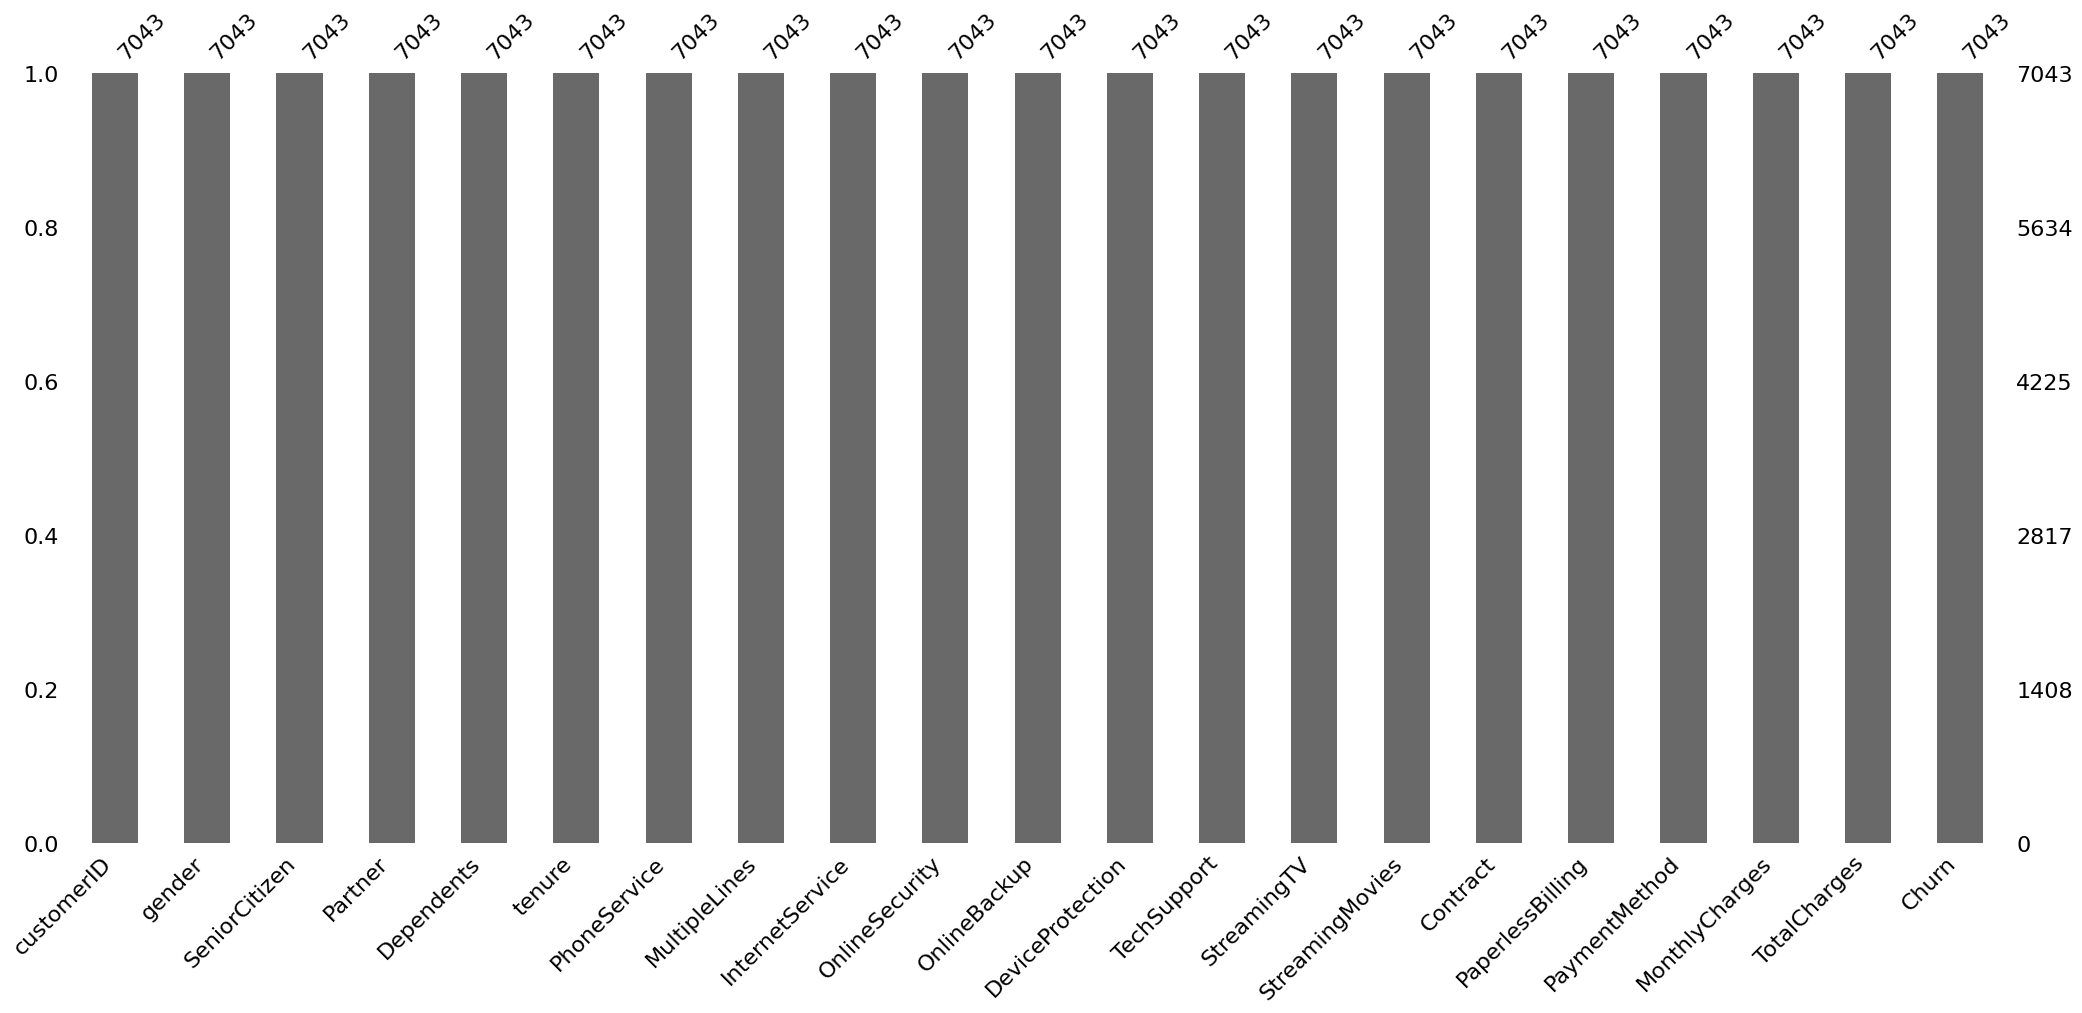

In [ ]:
# exploratory the missing values
import missingno as msno
msno.bar(df);

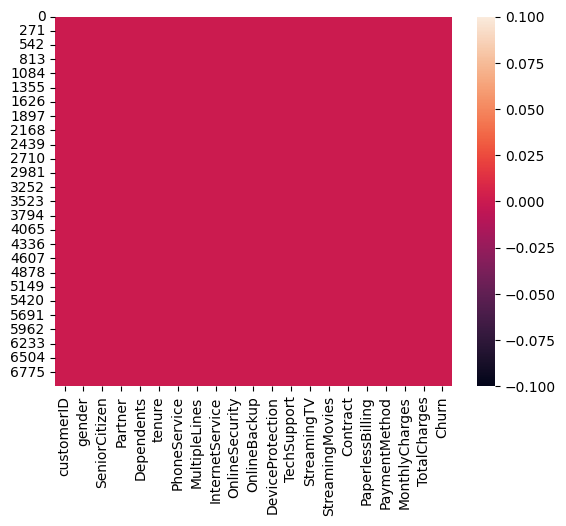

In [ ]:
# visualising the missing values
sns.heatmap(df.isnull());

In [ ]:
# Check the descriptive statistics of numeric variables
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

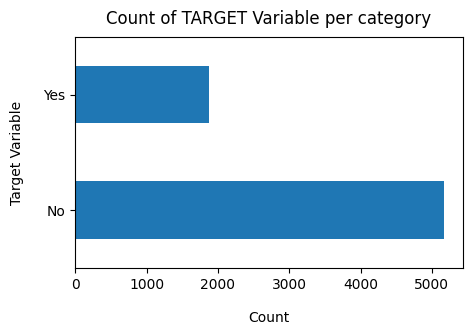

In [ ]:
df['Churn'].value_counts().plot(kind='barh', figsize=(5, 3))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [ ]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
100*df['Churn'].value_counts()/len(df['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

## Data Cleaning


Create a copy of base data for manupulation & processing

In [ ]:
df1=df.copy()

Total Charges should be numeric amount. Let's convert it to numerical data type

In [ ]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges, errors='coerce')
df1.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
#Removing missing values
df1.dropna(how = 'any', inplace = True)



In [ ]:
df1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Remove columns not required for processing

In [ ]:
#drop column customerID and tenure
df1.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
df1.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Univariate Analysis


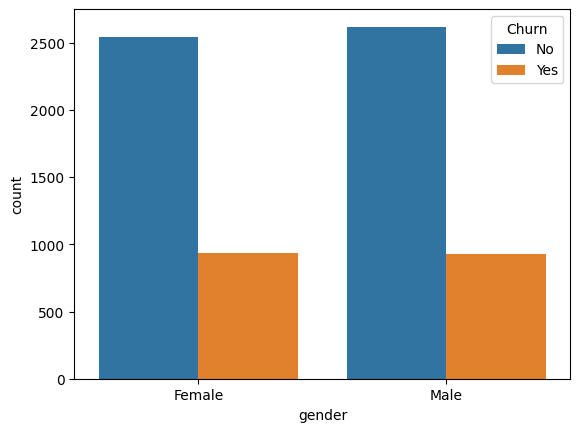

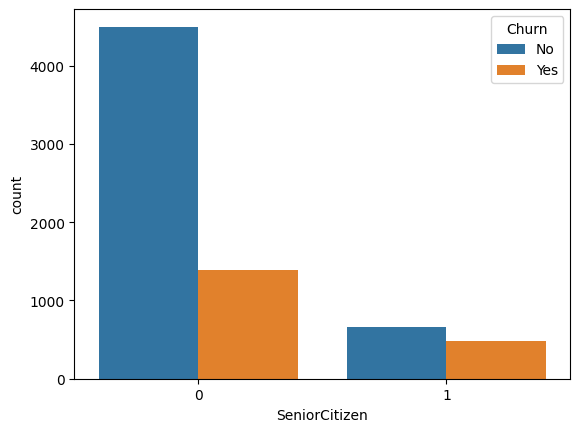

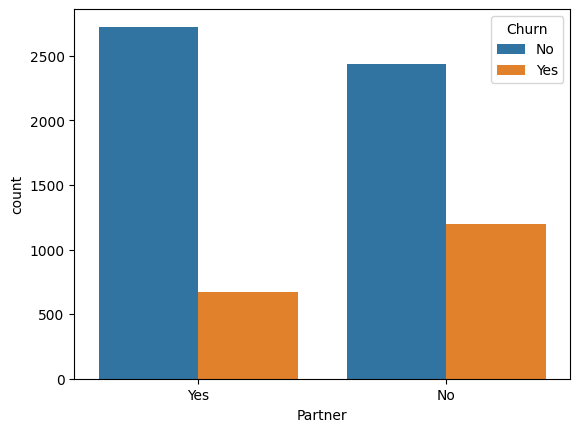

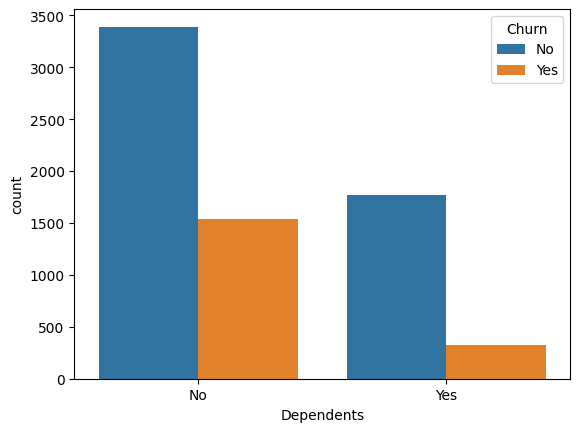

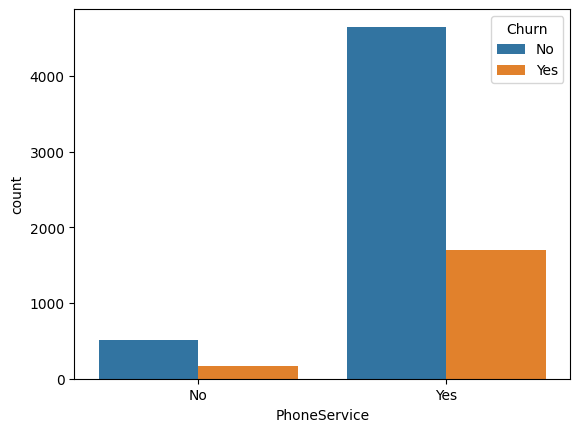

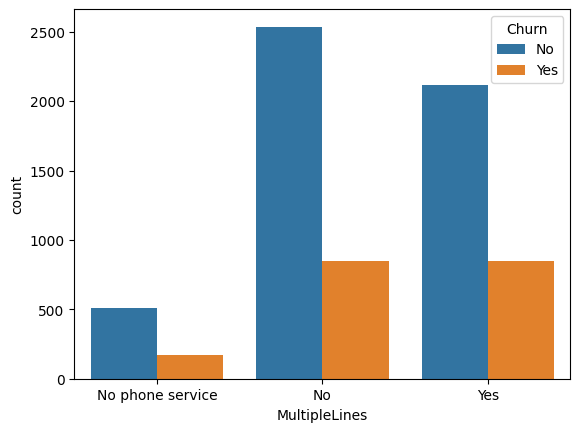

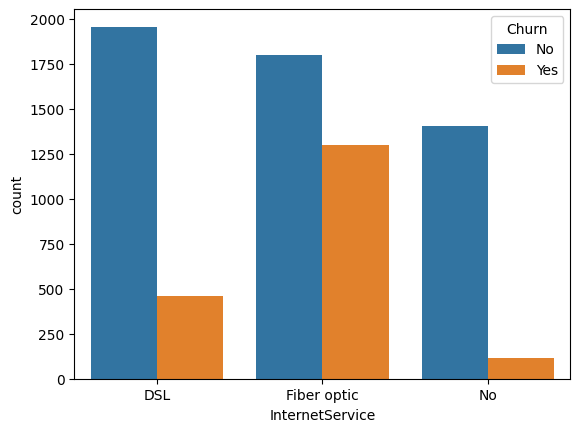

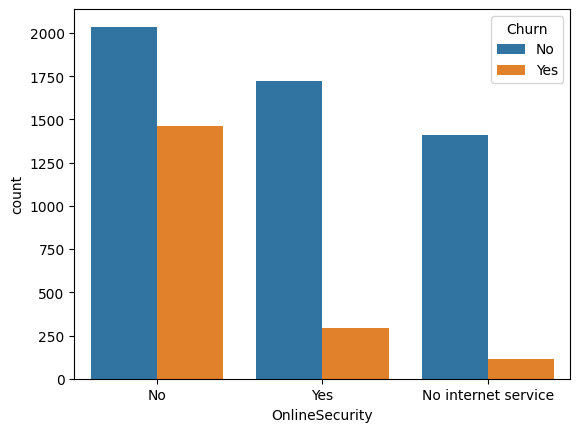

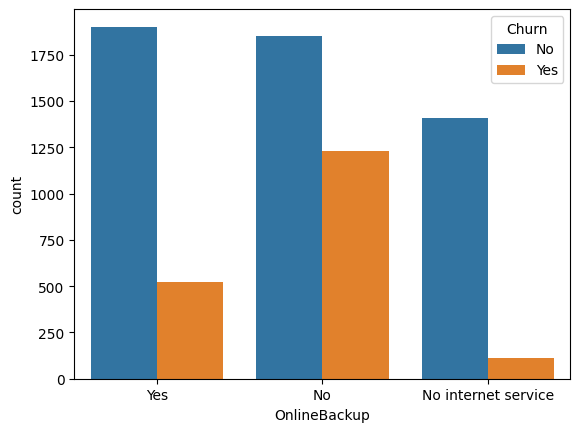

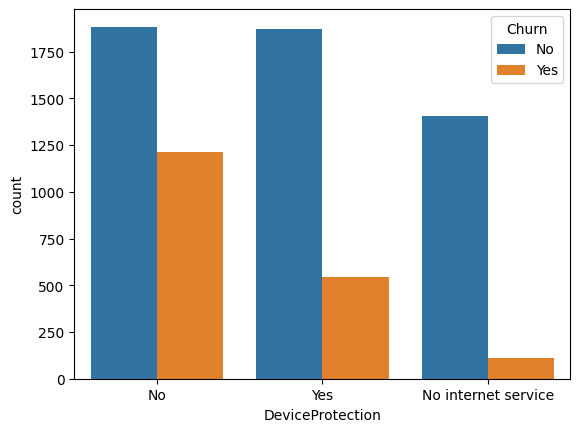

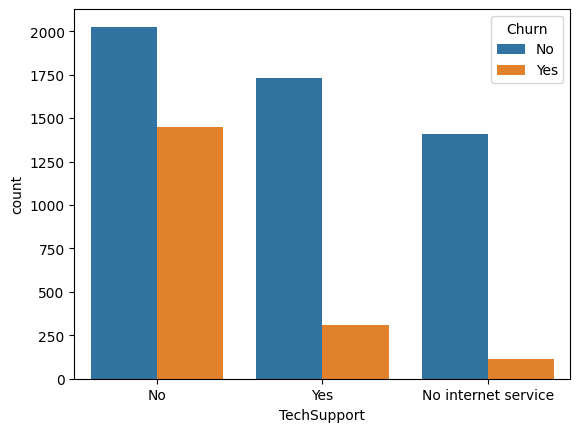

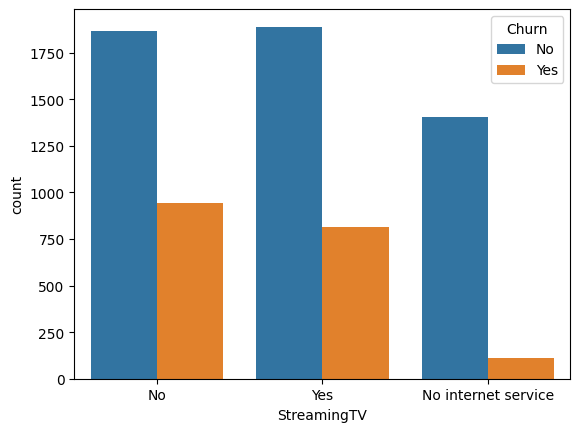

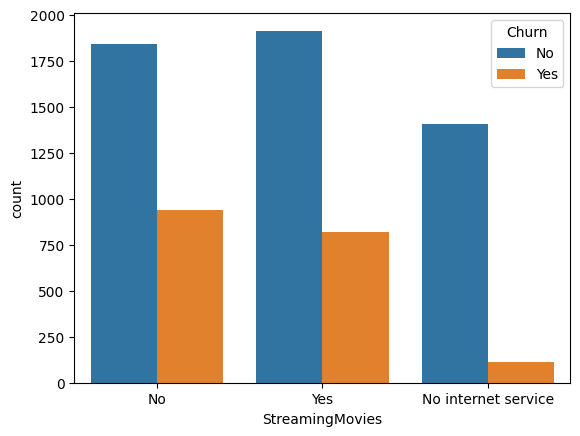

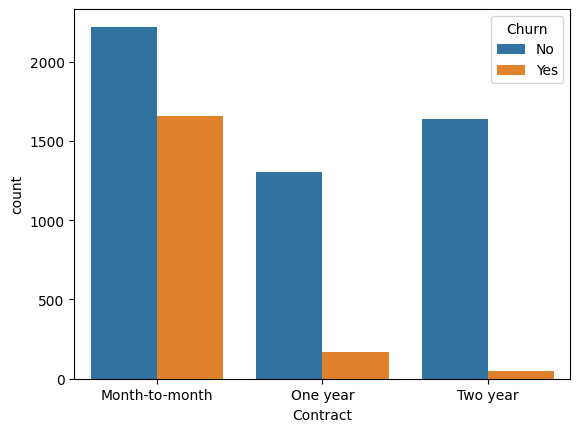

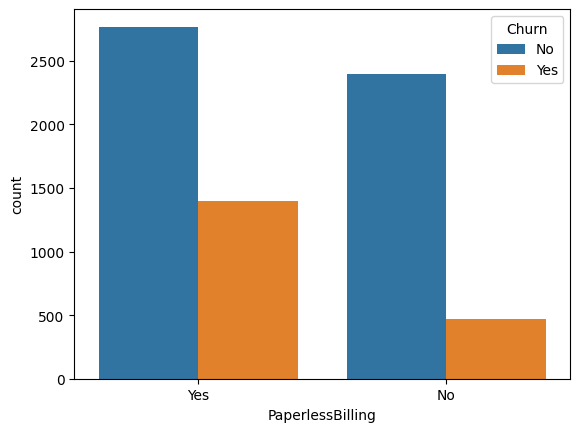

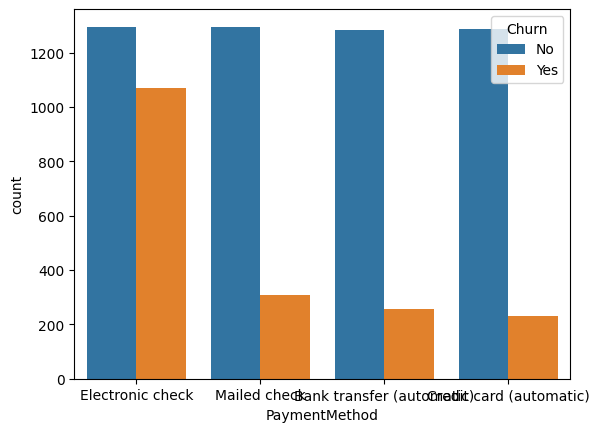

In [ ]:
for i, group in enumerate(df1.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df1, x=group, hue='Churn')

Convert the target variable 'Churn'  in a binary numeric variable i.e. Yes=1 ; No = 0





In [ ]:
df1['Churn'] = np.where(df1.Churn == 'Yes',1,0)

Convert all the categorical variables into dummy variables

In [ ]:
df1_dummies = pd.get_dummies(df1)
df1_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


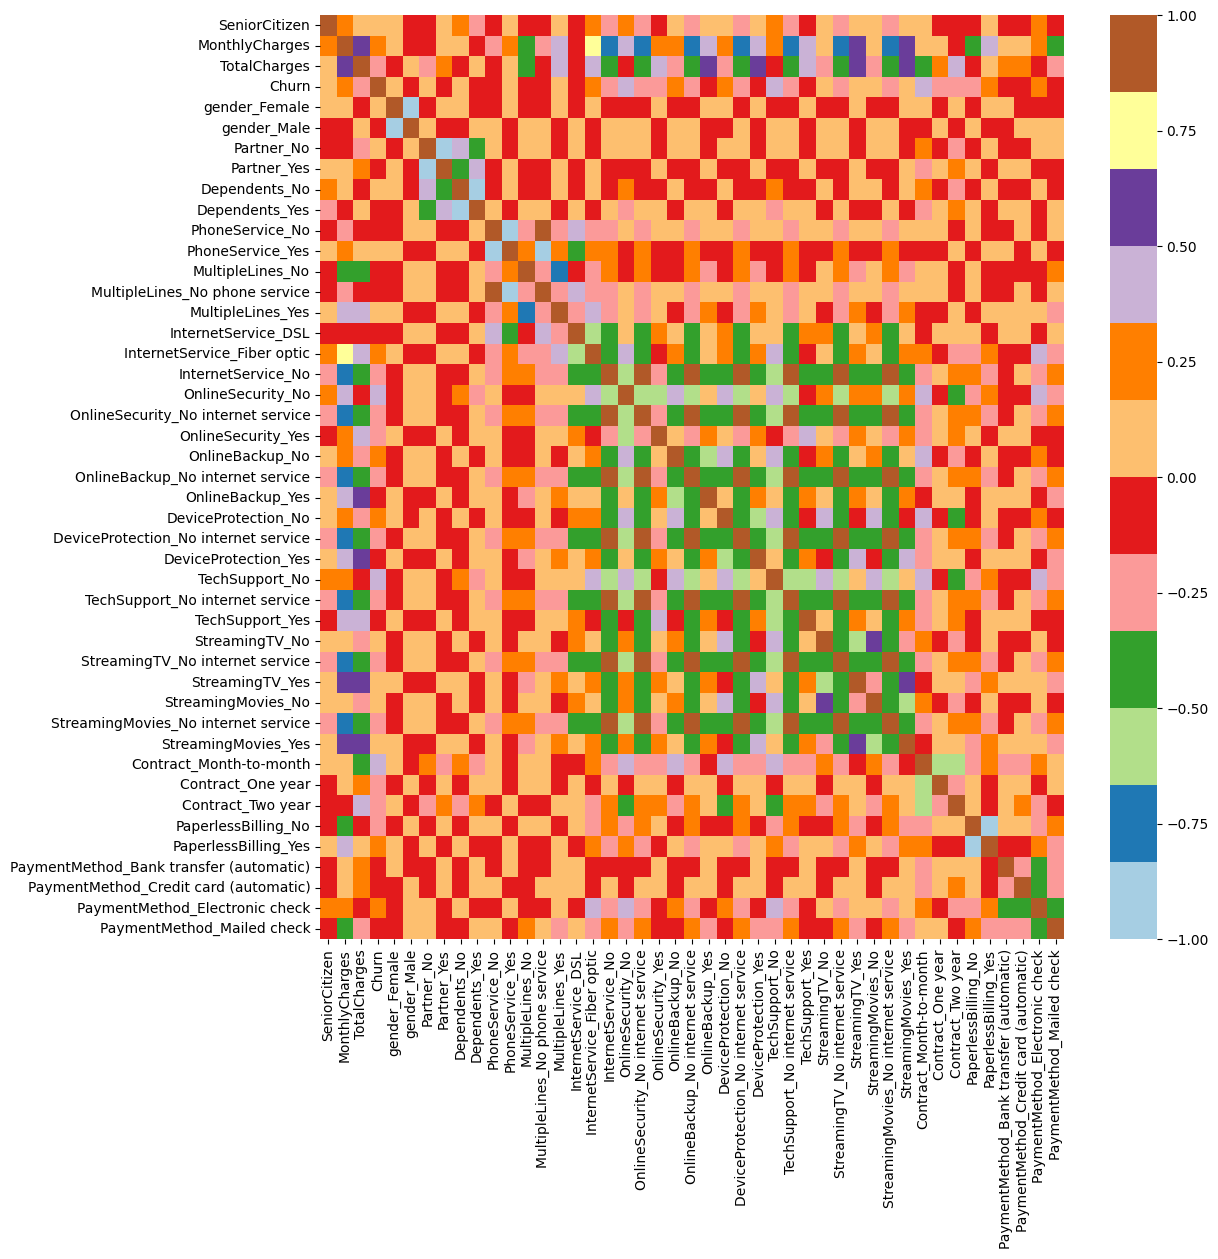

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df1_dummies.corr(), cmap="Paired");

# Bivariate Analysis

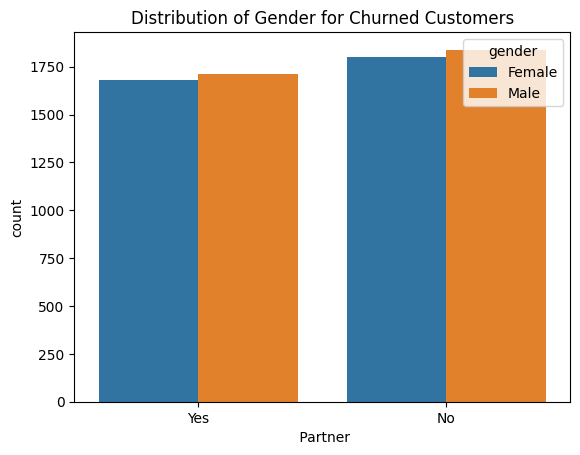

In [ ]:
sns.countplot(x = 'Partner', data = df1, hue = 'gender')
plt.title("Distribution of Gender for Churned Customers")
plt.xlabel(" Partner");

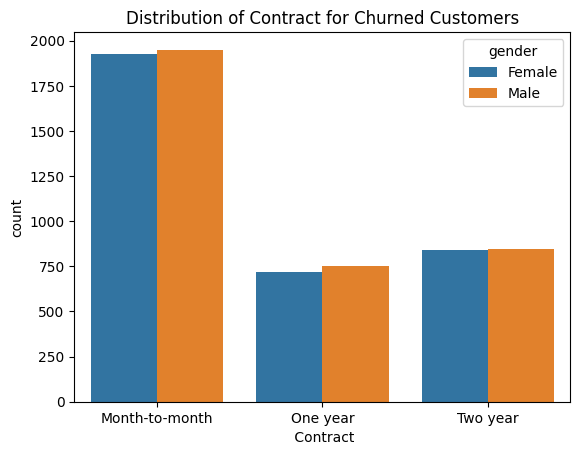

In [ ]:
sns.countplot(x = 'Contract', data = df1, hue = 'gender')
plt.title("Distribution of Contract for Churned Customers")
plt.xlabel(" Contract");

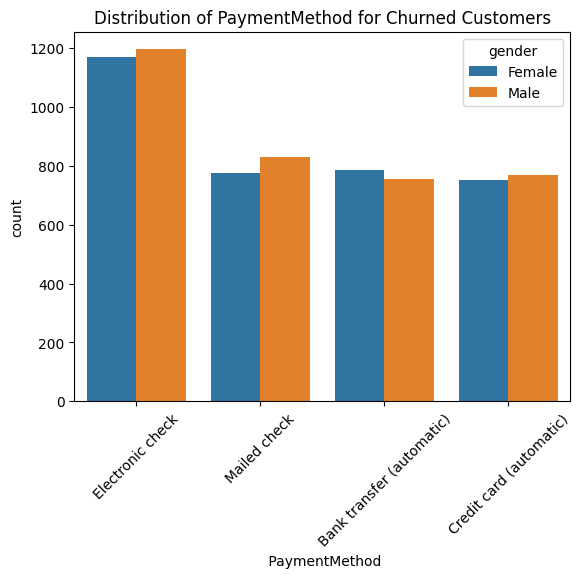

In [ ]:
sns.countplot(x = 'PaymentMethod', data = df1, hue = 'gender')
plt.title("Distribution of PaymentMethod for Churned Customers")
plt.xlabel(" PaymentMethod")
plt.xticks(rotation=45);

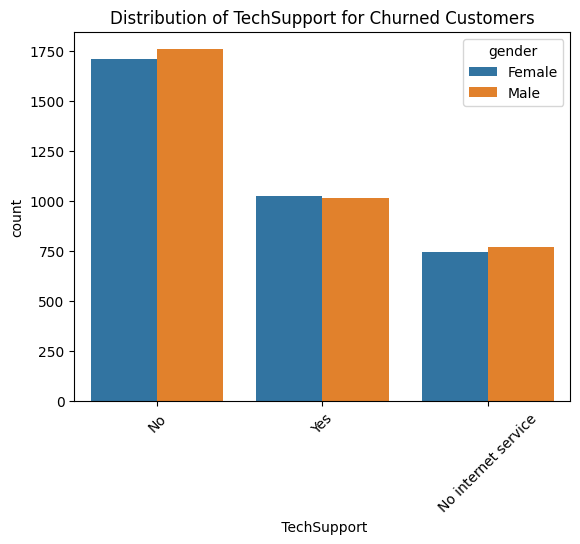

In [ ]:
sns.countplot(x = 'TechSupport', data = df1, hue = 'gender')
plt.title("Distribution of TechSupport for Churned Customers")
plt.xlabel(" TechSupport")
plt.xticks(rotation=45);

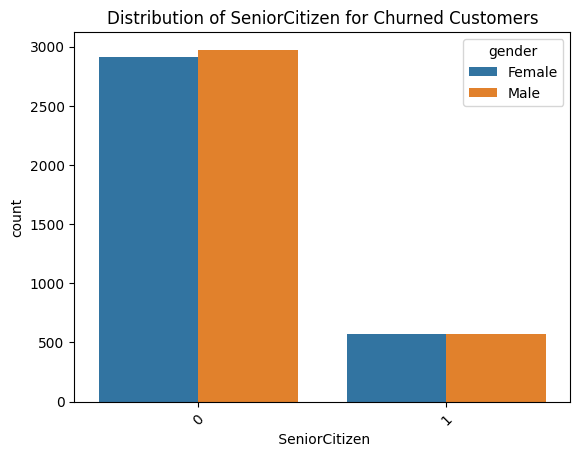

In [ ]:
sns.countplot(x = 'SeniorCitizen', data = df1, hue = 'gender')
plt.title("Distribution of SeniorCitizen for Churned Customers")
plt.xlabel(" SeniorCitizen")
plt.xticks(rotation=45);

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   PhoneService      7032 non-null   object 
 5   MultipleLines     7032 non-null   object 
 6   InternetService   7032 non-null   object 
 7   OnlineSecurity    7032 non-null   object 
 8   OnlineBackup      7032 non-null   object 
 9   DeviceProtection  7032 non-null   object 
 10  TechSupport       7032 non-null   object 
 11  StreamingTV       7032 non-null   object 
 12  StreamingMovies   7032 non-null   object 
 13  Contract          7032 non-null   object 
 14  PaperlessBilling  7032 non-null   object 
 15  PaymentMethod     7032 non-null   object 
 16  MonthlyCharges    7032 non-null   float64


In [ ]:
# converting non numeric to numeric for train and test data
#Importing Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df1:
  if df1[col].dtype=='object':
    df1[col]=le.fit_transform(df1[col])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   PhoneService      7032 non-null   int64  
 5   MultipleLines     7032 non-null   int64  
 6   InternetService   7032 non-null   int64  
 7   OnlineSecurity    7032 non-null   int64  
 8   OnlineBackup      7032 non-null   int64  
 9   DeviceProtection  7032 non-null   int64  
 10  TechSupport       7032 non-null   int64  
 11  StreamingTV       7032 non-null   int64  
 12  StreamingMovies   7032 non-null   int64  
 13  Contract          7032 non-null   int64  
 14  PaperlessBilling  7032 non-null   int64  
 15  PaymentMethod     7032 non-null   int64  
 16  MonthlyCharges    7032 non-null   float64


In [ ]:
# feature scaling
from sklearn.model_selection import train_test_split
# spliting the data
x = df1.iloc[:,0:-1]
y = df1.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=40)

In [ ]:
# count the number rows and columns for x_test
x_test.shape

(2110, 18)

In [ ]:
# count the number rows and columns for x_train
x_train.shape

(4922, 18)

In [ ]:
# count the number rows for y_test
y_test.shape

(2110,)

In [ ]:
# count the number rows for y_train
y_train.shape

(4922,)

In [ ]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
rescale_x_train = scaler.fit_transform(x_train)
rescale_x_test = scaler.fit_transform(x_test)
print(rescale_x_train.shape)
print(rescale_x_test.shape)

(4922, 18)
(2110, 18)


## Applying ML algorithm to the pre-processed columns and find out, which of these algorithms is best suitable.


# LogisticRegression

In [ ]:
# importing the LogisticRegression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=0)
logreg.fit(rescale_x_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
#Importing scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = logreg.predict(rescale_x_test)
print("logistic regression training set:",logreg.score(x_train, y_train)*100)
print("logistic regression testing set:",logreg.score(x_test, y_test)*100)
print("Accuracy of logistic regression classifier: ", accuracy_score(y_test,y_pred)*100)

print(confusion_matrix(y_test,y_pred))

logistic regression training set: 75.66030069077611
logistic regression testing set: 75.16587677725119
Accuracy of logistic regression classifier:  79.0995260663507
[[1381  176]
 [ 265  288]]


# cross validation

The cross-validation is  done using the ShuffleSplit method

In [ ]:
# cross validation
from sklearn.model_selection import ShuffleSplit
model= LogisticRegression()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)*100
print(results)
print(np.mean(results))

[78.82018479 77.04335466 80.3127221  81.09452736 79.31769723 81.30774698
 79.74413646 78.60696517 78.9623312  80.02842928]
79.52380952380952


# Decision Tree



In [ ]:
# decision tree classification  without rescaled
from sklearn.tree import DecisionTreeClassifier
classification = DecisionTreeClassifier()
classification = classification.fit(x_train,y_train)
y_pred = classification.predict(x_test)
print("decision tree training set:",classification.score(x_train, y_train)*100)
print("decision tree testing set:",classification.score(x_test, y_test)*100)
print("Accuracy:", accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test, y_pred))

decision tree training set: 99.7765136123527
decision tree testing set: 72.3696682464455
Accuracy: 72.3696682464455
[[1235  322]
 [ 261  292]]


# cross validation

In [ ]:
# cross validation
from sklearn.model_selection import ShuffleSplit
model= DecisionTreeClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results*100)
print(np.mean(results)*100)

[72.28144989 73.84506041 72.3525231  71.92608387 72.77896233 72.13930348
 74.55579247 73.34754797 72.70788913 72.3525231 ]
72.82871357498223


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print("rf training set:",rf.score(x_train, y_train)*100)
print("rf testing set:",rf.score(x_test, y_test)*100)
print("Random Forest classifier has accuracy of: ", rf.score(x_test, y_test)*100)
# Evaluate the confusion_matrix
print(confusion_matrix(y_test, y_pred))

rf training set: 99.7765136123527
rf testing set: 77.44075829383887
Random Forest classifier has accuracy of:  77.44075829383887
[[1366  191]
 [ 285  268]]


# cross validation

In [ ]:
# cross validation
from sklearn.model_selection import ShuffleSplit
model=RandomForestClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results*100)
print(np.mean(results)*100)

[77.75408671 78.60696517 78.9623312  78.46481876 80.09950249 79.95735608
 78.25159915 79.38877043 77.82515991 77.82515991]
78.71357498223169


# conclusion

Hence we got accuracy on different classification

-logisitic regression got accuracy 79%

-DecisionTree got accuracy 72%

-Random Forest got accuracy 78%

we have done all the elementry EDA steps needed and plotted various graphs to determine the correlation among the independent variables and also between the independent and dependent variable.

After feature selection we used four machine learning models and achieved quite good accuracy 79% in logistic regression for predicting the credit card approval.
